<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW3/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW3 Life Expectancy: Statistical Analysis on Factors Influencing Life Expectancy

In [84]:
#Import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
import mysql.connector as connection

mydb = connection.connect(host="208.109.18.154",user="ids10", passwd="Pxd5539",database = 'ids10db', use_pure=True)

try:
  query = "Select * from life_expectancy;"
  df = pd.read_sql(query,mydb)
  mydb.close() #close the connection
except Exception as e:
  mydb.close()
  print(str(e))


,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0
...,...,...,...,...,...,...,...,...,...,...,...
700,Zimbabwe,2010,52.4,527,5.21,53.308581,29.4,5.37,713.635620,1486317,10.0
701,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1
702,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8
703,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4


In [85]:
#Import dataset from cleaned csv file
# df = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW3/clean_life_expectancy.csv")

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0
...,...,...,...,...,...,...,...,...,...,...,...
700,Zimbabwe,2010,52.4,527,5.21,53.308581,29.4,5.37,713.635620,1486317,10.0
701,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1
702,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8
703,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4


In [119]:
df

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0
...,...,...,...,...,...,...,...,...,...,...,...
700,Zimbabwe,2010,52.4,527,5.21,53.308581,29.4,5.37,713.635620,1486317,10.0
701,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1
702,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8
703,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4


In [86]:
# shape of data
df.shape

(705, 11)

In [87]:
# describing the data
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,7.050000e+02,705.000000
mean,2012.005674,70.438014,157.858156,4.328468,1047.030049,39.155603,6.236156,8080.951582,1.400613e+07,12.631348
std,1.422215,9.344785,112.711857,4.157557,2562.989968,20.828193,2.598166,15653.407562,5.763247e+07,2.968197
min,2010.000000,0.000000,0.000000,0.010000,0.108056,0.000000,0.760000,8.376432,4.100000e+01,0.000000
25%,2011.000000,63.800000,68.000000,0.080000,56.589842,21.700000,4.480000,669.959000,2.485830e+05,10.600000
50%,2012.000000,72.800000,139.000000,3.410000,200.660099,44.900000,5.960000,2581.818554,1.457295e+06,12.700000
75%,2013.000000,76.300000,229.000000,7.560000,751.379355,58.300000,8.130000,7112.335750,8.177693e+06,14.700000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,79.300000,16.610000,119172.741800,1.293859e+09,20.400000


In [88]:
# check null data
df.isnull().sum()

Country                   0
Year                      0
Life_Expectancy           0
Adult_Mortality           0
Alcohol                   0
Percentage_Expenditure    0
BMI                       0
Total_Expenditure         0
GDP                       0
Population                0
Schooling                 0
dtype: int64

Data is clean. no null value is present in dataset.

#Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67c024b290>,
      dtype=object)

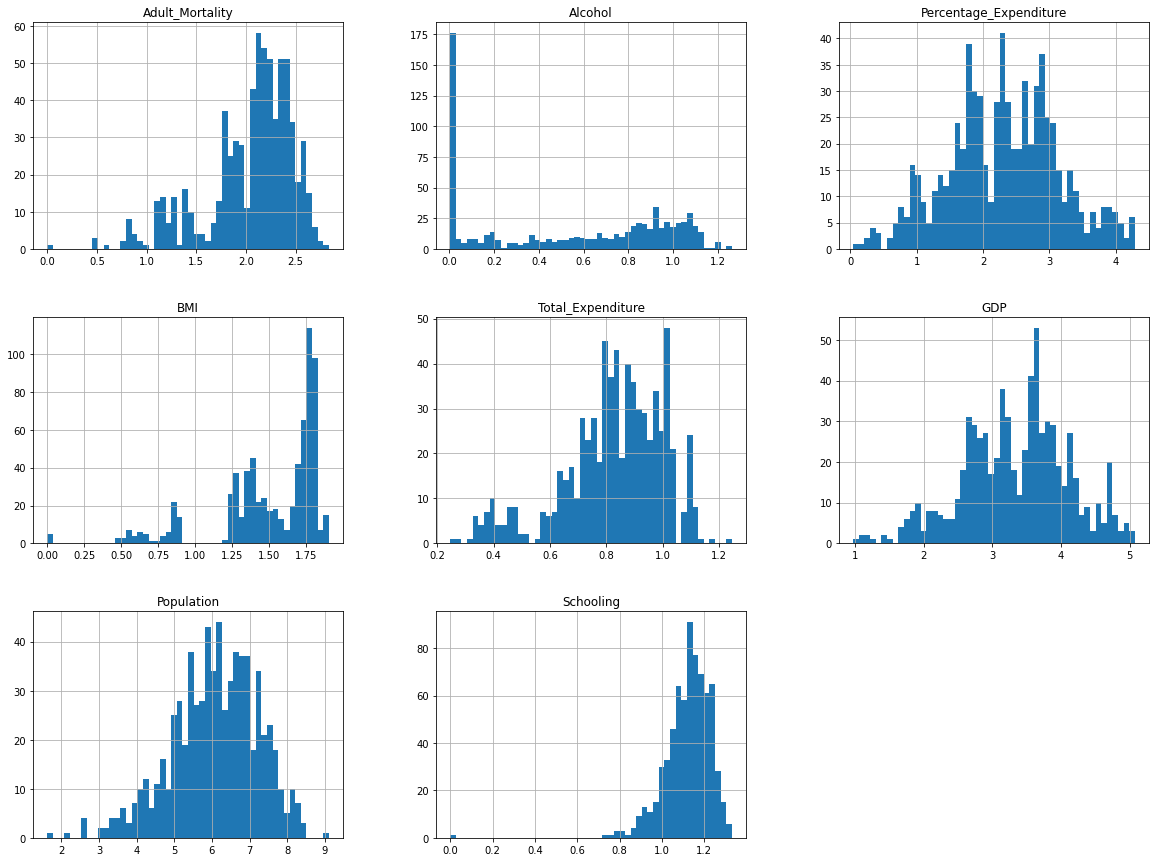

In [89]:
# Histogram of all the features without target class life_expectancy
x = df[['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling']]
x_norm = np.log10(x + 1)
x_norm.hist(bins=50, figsize=(20,15))

In [90]:
#correlation matrix
xy = pd.concat([x_norm, df['Life_Expectancy']], axis=1)
corr_matrix = xy.corr()
corr_matrix['Life_Expectancy'].sort_values(ascending=True)

Adult_Mortality          -0.440639
Population               -0.062422
Total_Expenditure         0.166479
BMI                       0.370680
Alcohol                   0.458893
GDP                       0.531861
Percentage_Expenditure    0.556109
Schooling                 0.797915
Life_Expectancy           1.000000
Name: Life_Expectancy, dtype: float64

In [91]:
#Plot the correlation heatmap
corr_matrix.style.background_gradient(cmap='coolwarm')

,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Life_Expectancy
Adult_Mortality,1.000000,-0.194521,-0.242402,-0.225265,-0.114093,-0.274549,0.120452,-0.314838,-0.440639
Alcohol,-0.194521,1.000000,0.480123,0.225381,0.201871,0.471562,0.015321,0.515010,0.458893
Percentage_Expenditure,-0.242402,0.480123,1.000000,0.282783,0.240851,0.935203,0.001983,0.537198,0.556109
BMI,-0.225265,0.225381,0.282783,1.000000,0.066576,0.287458,-0.071880,0.347254,0.370680
Total_Expenditure,-0.114093,0.201871,0.240851,0.066576,1.000000,0.168921,-0.015865,0.148936,0.166479
GDP,-0.274549,0.471562,0.935203,0.287458,0.168921,1.000000,-0.007983,0.531163,0.531861
Population,0.120452,0.015321,0.001983,-0.071880,-0.015865,-0.007983,1.000000,-0.043179,-0.062422
Schooling,-0.314838,0.515010,0.537198,0.347254,0.148936,0.531163,-0.043179,1.000000,0.797915
Life_Expectancy,-0.440639,0.458893,0.556109,0.370680,0.166479,0.531861,-0.062422,0.797915,1.000000


**1. How does Adult mortality rates affect life expectancy?**
Ans: From the above table it seems that life_expectancy does not have any impact from adult mortality and population. 

**2. Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**
Ans: Yes, these factors has positive corelation with life-expectancy.

**3. What is the impact of schooling on the lifespan of humans?**
Ans: Class life_expectancy is highly correlated with class schooling(around 79%).


#linear regression models

 independent variable with highest correlation with life expectancy
 schooling:79
 Percentage_Expenditure:55
 GDP:53

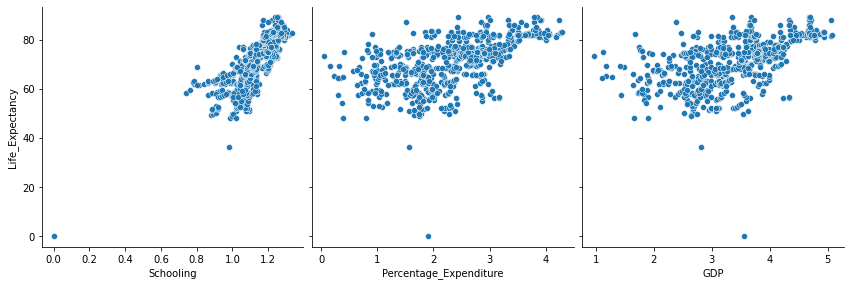

In [92]:
sns.pairplot(xy, x_vars=['Schooling','Percentage_Expenditure', 'GDP'], y_vars=['Life_Expectancy'], height=4, aspect=1, kind='scatter')
plt.show();

In [93]:
lr = linear_model.LinearRegression()
x = xy['Schooling'].values.reshape(-1,1)
y = xy['Life_Expectancy'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
lr.fit(x_train, y_train)
#Get the intercept and slope
lr_schooling_intercept, lr_schooling_coef = lr.intercept_[0], lr.coef_[0][0]
print('schooling intercept value: ',lr_schooling_intercept)
print('schooling coeficient value: ',lr_schooling_coef)

schooling intercept value:  -6.8453331689198365
schooling coeficient value:  68.86392384275626


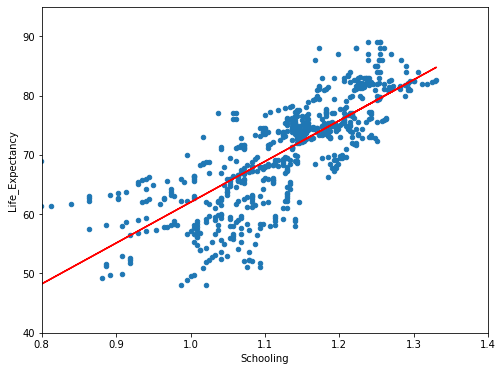

In [94]:
#Plot for schooling
xy.plot(kind='scatter', x='Schooling', y='Life_Expectancy', figsize=(8, 6))
plt.axis([0.8, 1.40, 40, 95])
plt.plot(x_train, lr_schooling_intercept + lr_schooling_coef*x_train, "r")
plt.show()

In [95]:
#Get R^2 and MSE
y_test_predictions = lr.predict(x_test)
r2_schooling = r2_score(y_test, y_test_predictions)
mse_schooling = mean_squared_error(y_test, y_test_predictions)
print('schooling R2 score:',r2_schooling)
print('schooling Mean squared error:',mse_schooling)

schooling R2 score: 0.6258393186516248
schooling Mean squared error: 27.825341632988387


In [96]:
lr = linear_model.LinearRegression()
x = xy['Percentage_Expenditure'].values.reshape(-1,1)
y = xy['Life_Expectancy'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
lr.fit(x_train, y_train)
#Get the intercept and slope
lr_Percentage_Expenditure_intercept, lr_Percentage_Expenditure_coef = lr.intercept_[0], lr.coef_[0][0]
print('Percentage_Expenditure intercept value: ',lr_Percentage_Expenditure_intercept)
print('Percentage_Expenditure coeficient value: ',lr_Percentage_Expenditure_coef)

Percentage_Expenditure intercept value:  55.33175791973635
Percentage_Expenditure coeficient value:  6.537920865987603


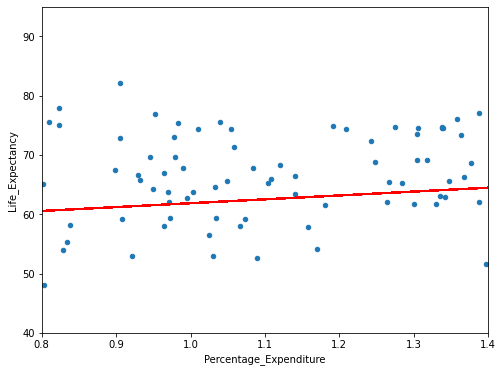

In [97]:
#Plot for Percentage_Expenditure
xy.plot(kind='scatter', x='Percentage_Expenditure', y='Life_Expectancy', figsize=(8, 6))
plt.axis([0.8, 1.40, 40, 95])
plt.plot(x_train, lr_Percentage_Expenditure_intercept + lr_Percentage_Expenditure_coef*x_train, "r")
plt.show()

In [98]:
#Get R^2 and MSE
y_test_predictions = lr.predict(x_test)
r2_Percentage_Expenditure = r2_score(y_test, y_test_predictions)
mse_Percentage_Expenditure = mean_squared_error(y_test, y_test_predictions)
print('Percentage_Expenditure R2 score:',r2_Percentage_Expenditure)
print('Percentage_Expenditure Mean squared error:',mse_Percentage_Expenditure)

Percentage_Expenditure R2 score: 0.3026801982322955
Percentage_Expenditure Mean squared error: 51.85783188578314


In [99]:
lr = linear_model.LinearRegression()
x = xy['GDP'].values.reshape(-1,1)
y = xy['Life_Expectancy'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
lr.fit(x_train, y_train)
#Get the intercept and slope
lr_GDP_intercept, lr_GDP_coef = lr.intercept_[0], lr.coef_[0][0]
print('GDP intercept value: ',lr_GDP_intercept)
print('GDP coeficient value: ',lr_GDP_coef)

GDP intercept value:  47.80363669259094
GDP coeficient value:  6.757768110848172


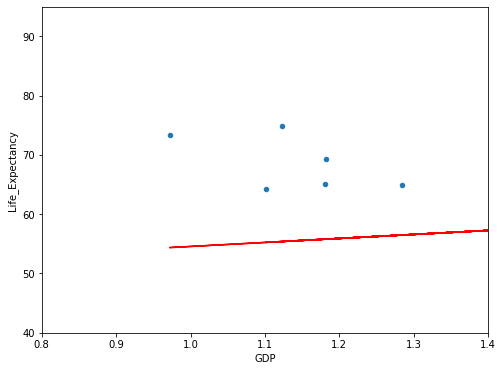

In [100]:
#Plot for schooling
xy.plot(kind='scatter', x='GDP', y='Life_Expectancy', figsize=(8, 6))
plt.axis([0.8, 1.40, 40, 95])
plt.plot(x_train, lr_GDP_intercept + lr_GDP_coef*x_train, "r")
plt.show()

In [101]:
#Get R^2 and MSE
y_test_predictions = lr.predict(x_test)
r2_GDP = r2_score(y_test, y_test_predictions)
mse_GDP = mean_squared_error(y_test, y_test_predictions)
print('GDP R2 score:',r2_GDP)
print('GDP Mean squared error:',mse_GDP)

GDP R2 score: 0.3112338662467511
GDP Mean squared error: 51.221718187626315


#Model Accuracy

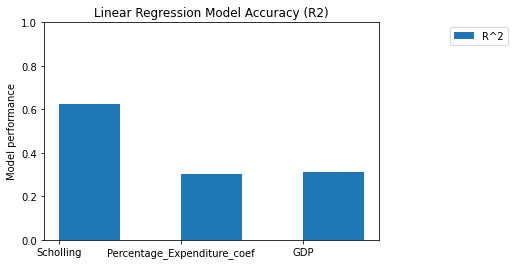

In [102]:
labels = ['Scholling','Percentage_Expenditure_coef', 'GDP']
r2_values = [r2_schooling, r2_Percentage_Expenditure, r2_GDP]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, r2_values, width, label='R^2')

ax.set_ylabel('Model performance')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0))

plt.title('Linear Regression Model Accuracy (R2)')
plt.show()

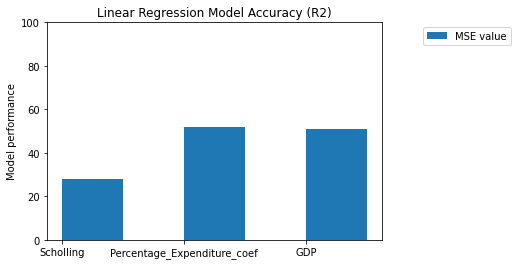

In [108]:
labels = ['Scholling','Percentage_Expenditure_coef', 'GDP']
mse_values = [mse_schooling, mse_Percentage_Expenditure, mse_GDP]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, mse_values, width, label='MSE value')

ax.set_ylabel('Model performance')
ax.set_xticks(x)
ax.set_ylim(0,100)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0))

plt.title('Linear Regression Model Accuracy (R2)')
plt.show()

Conslusion: From the above two chart, R2 values of schooling is better than other models. and the error rate is also lower than other models. so we can say that performance of schooling model is better than other models. while it seems that model performance of expenditure and GDP are same.  